In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
city_data = pd.DataFrame(city_data_to_load)
ride_data = pd.DataFrame(ride_data_to_load)

# check size of data files
# print("city: {}" .format(city_data.shape))
# print("ride: {}" .format(ride_data.shape))

# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, how="left", on="city")
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# print("data: {}" .format(data.shape))

## Bubble Plot of Ride Sharing Data

In [18]:
# Obtain the x and y coordinates for each of the three city types
r_data = data.loc[data["type"] == "Rural"]
u_data = data.loc[data["type"] =="Urban"]
s_data = data.loc[data["type"] =="Suburban"]

In [84]:
rural = pd.DataFrame({"Fare": r_data.groupby("city")["fare"].sum(),
                      "Total Rides": r_data.groupby("city")["ride_id"].count(),
                      "# of Drivers": r_data.groupby("city")["driver_count"].first(),
                      "Type": r_data.groupby("city")["type"].first()
})

urban = pd.DataFrame({"Fare": u_data.groupby("city")["fare"].sum(),
                      "Total Rides": u_data.groupby("city")["ride_id"].count(),
                      "# of Drivers": u_data.groupby("city")["driver_count"].first(),
                      "Type": u_data.groupby("city")["type"].first()})


suburban = pd.DataFrame({"Fare": s_data.groupby("city")["fare"].sum(),
                         "Total Rides": s_data.groupby("city")["ride_id"].count(),
                        "# of Drivers": s_data.groupby("city")["driver_count"].first(),
                        "Type": s_data.groupby("city")["type"].first()})



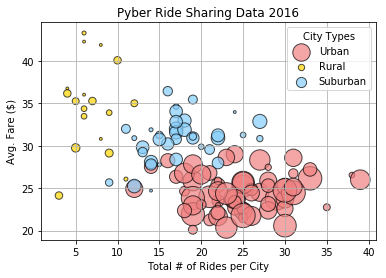

In [124]:
# Build the scatter plots for each city types
xu = urban["Total Rides"]
yu = urban["Fare"]/urban["Total Rides"]
sizeu= (urban["# of Drivers"])*8
plt.scatter(xu, yu, color="lightcoral", edgecolor="black", s=sizeu, alpha=0.7
#label="Urban"
)

xr = rural["Total Rides"]
yr = rural["Fare"]/rural["Total Rides"]
sizer= (rural["# of Drivers"])*8
plt.scatter(xr, yr, color="gold", edgecolor="black", s=sizer, alpha =0.7
#label="Rural"
)

xs = suburban["Total Rides"]
ys = suburban["Fare"]/suburban["Total Rides"]
sizes= (suburban["# of Drivers"])*8
plt.scatter(xs, ys, color="lightskyblue", edgecolor="black", s=sizes, alpha =0.7
#label="Suburban"
)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total # of Rides per City")
plt.ylabel("Avg. Fare ($)")

# Create a legend

plt.legend(("Urban", "Rural", "Suburban"), title ="City Types", fancybox=True, 
#markerscale=.5
)

# Incorporate a text label regarding circle size

# Save Figure
#plt.savefig("BubblePlot-Pyber Ride Sharing.png")

In [116]:
# Show plot
plt.show()

## Total Fares by City Type

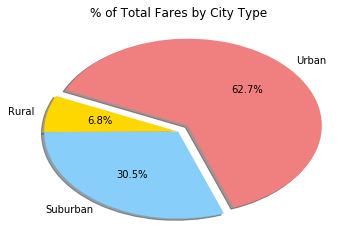

In [87]:
# Calculate Type Percents
tot_rfare = rural["Fare"].sum()
tot_ufare = urban["Fare"].sum()
tot_sfare = suburban["Fare"].sum()
#tot_fare = tot_rfare + tot_ufare + tot_sfare
# Build Pie Chart

fare = [tot_ufare, tot_rfare, tot_sfare]
labels = ["Urban", "Rural", "Suburban"]
color = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
plt.pie(fare, colors=color, explode=explode, shadow=True, labels =labels, autopct="%1.1f%%", 
        startangle=290)
plt.title("% of Total Fares by City Type")
#plt.axis("equal")

# Save Figure
plt.savefig("Fares by City Type.png")


In [88]:
# Show Figure
plt.show()

## Total Rides by City Type

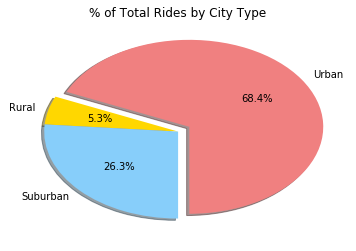

In [89]:
# Calculate Ride Percents
tot_rrides = rural["Total Rides"].sum()
tot_urides = urban["Total Rides"].sum()
tot_srides = suburban["Total Rides"].sum()
# Build Pie Chart
rides = [tot_urides, tot_rrides, tot_srides]
labels = ["Urban", "Rural", "Suburban"]
color = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
plt.pie(rides, colors=color, explode=explode, shadow=True, labels =labels, autopct="%1.1f%%", 
        startangle=270)
plt.title("% of Total Rides by City Type")
#plt.axis("equal")

# Save Figure
plt.savefig("Rides by City Type.png")


In [90]:
# Show Figure
plt.show()

## Total Drivers by City Type

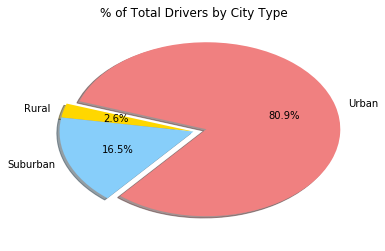

In [91]:
# Calculate Driver Percents
tot_rdrive = rural["# of Drivers"].sum()
tot_udrive = urban["# of Drivers"].sum()
tot_sdrive = suburban["# of Drivers"].sum()

# Build Pie Charts
drivers = [tot_udrive, tot_rdrive, tot_sdrive]
labels = ["Urban", "Rural", "Suburban"]
color = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
plt.pie(drivers, colors=color, explode=explode, shadow=True, labels =labels, autopct="%1.1f%%", 
        startangle=230)
plt.title("% of Total Drivers by City Type")

#plt.axis("equal")

# Save Figure
plt.savefig("Drivers by City Type.png")

In [92]:
# Show Figure
plt.show()